In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
#check the head
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Check tail
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
#checking the duplicacy
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [11]:
df["Gender"].value_counts(normalize = True)*100

Female    51.0
Male      49.0
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

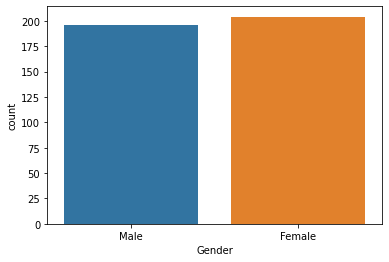

In [12]:
sns.countplot(x = "Gender",data = df)

<AxesSubplot:ylabel='Gender'>

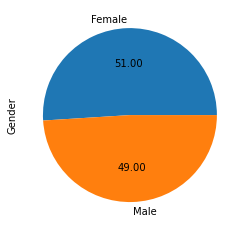

In [13]:
df["Gender"].value_counts().plot(kind ="pie",autopct = "%.2f")

In [14]:
def age_group(pi):
    if pi > 20 and pi <= 30:
        Age_group = "21-30"
    elif pi > 30 and pi <= 40:
        Age_group = "31-40"
    elif pi > 40 and pi <= 50:
        Age_group = "41-50"
    else:
        Age_group = "Above 50"
    return (Age_group)

In [15]:
df["Age_group"] = df["Age"].apply(age_group)

In [16]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_group
0,15624510,Male,19,19000,0,Above 50
1,15810944,Male,35,20000,0,31-40
2,15668575,Female,26,43000,0,21-30
3,15603246,Female,27,57000,0,21-30
4,15804002,Male,19,76000,0,Above 50
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,41-50
396,15706071,Male,51,23000,1,Above 50
397,15654296,Female,50,20000,1,41-50
398,15755018,Male,36,33000,0,31-40


In [17]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age_group'],
      dtype='object')

<AxesSubplot:xlabel='Age_group', ylabel='count'>

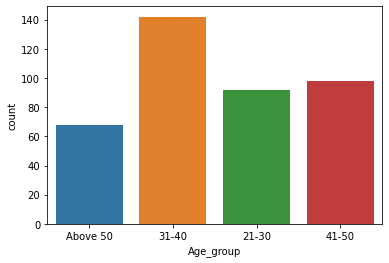

In [18]:
sns.countplot(data = df, x = "Age_group")

In [19]:
pd.crosstab(df["Age_group"],df["Purchased"],margins=True)

Purchased,0,1,All
Age_group,,,
21-30,86,6,92
31-40,109,33,142
41-50,39,59,98
Above 50,23,45,68
All,257,143,400


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

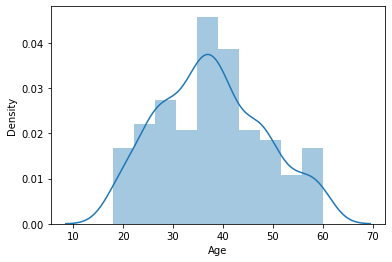

In [20]:
sns.distplot(df["Age"])

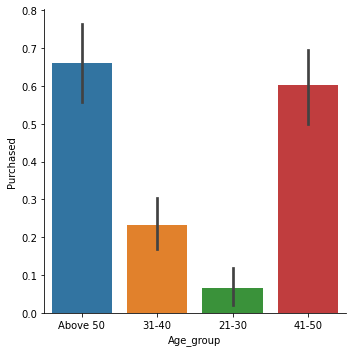

In [21]:
sns.catplot(data=df, y="Purchased",x="Age_group", kind="bar")

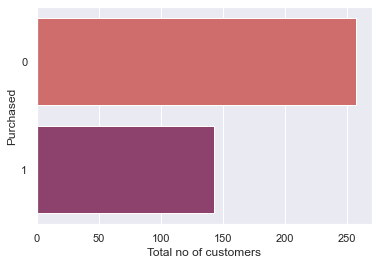

In [22]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Purchased",data=df, palette = "flare")
plt.ylabel("Purchased")
plt.xlabel("Total no of customers")
plt.show()

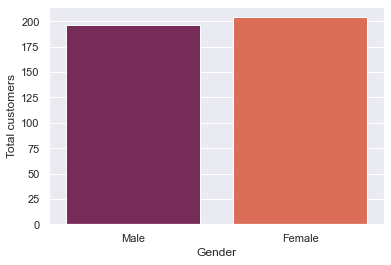

In [23]:
sns.set_theme(style = "darkgrid")
sns.countplot(data=df,x="Gender", palette = "rocket")
plt.xlabel("Gender")
plt.ylabel("Total customers")
plt.show()

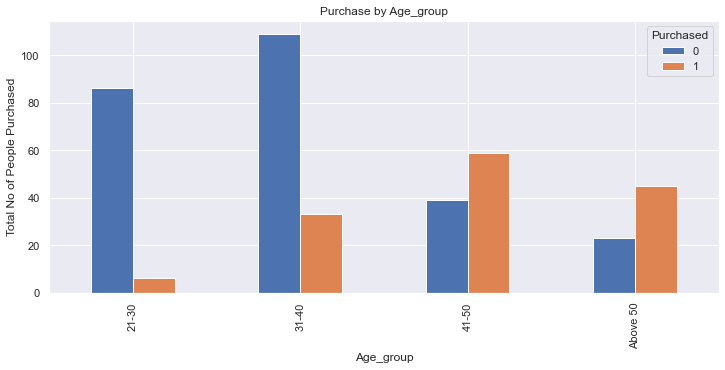

In [24]:
pd.crosstab(df["Age_group"],df["Purchased"]).plot(kind="bar",figsize=(12,5))
plt.title("Purchase by Age_group")
plt.xlabel("Age_group")
plt.ylabel("Total No of People Purchased")
plt.show()

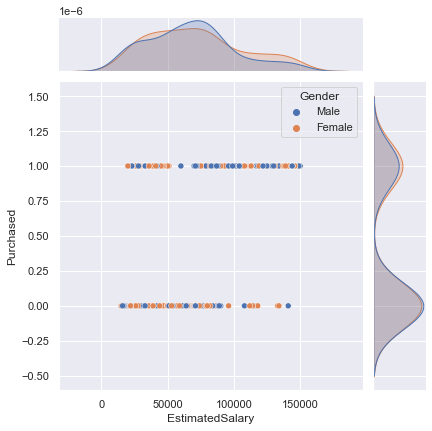

In [25]:
sns.jointplot(data = df,x="EstimatedSalary",y="Purchased",hue = "Gender",kind = "scatter")

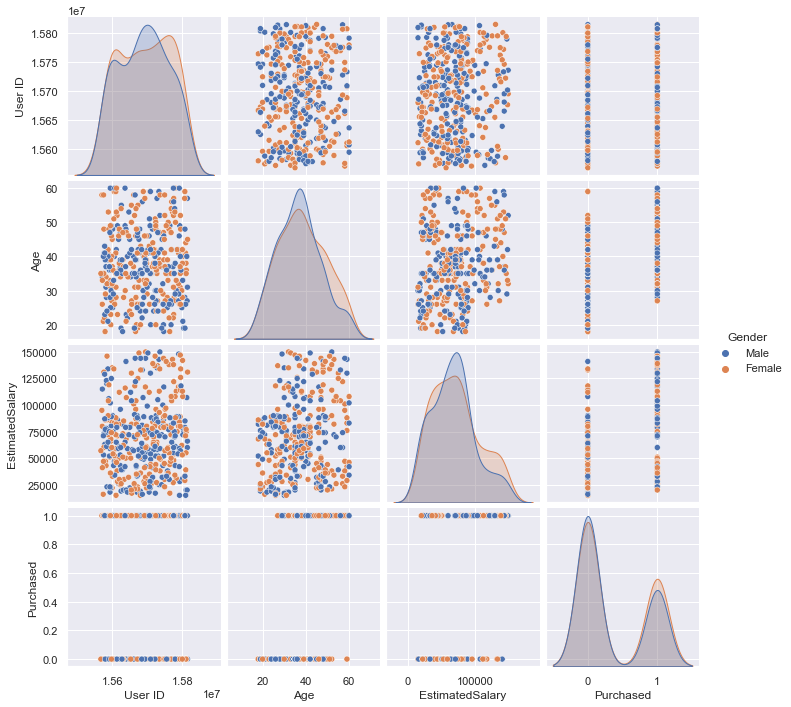

In [26]:
sns.pairplot(data = df,hue="Gender")

In [27]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_group
0,15624510,Male,19,19000,0,Above 50
1,15810944,Male,35,20000,0,31-40
2,15668575,Female,26,43000,0,21-30
3,15603246,Female,27,57000,0,21-30
4,15804002,Male,19,76000,0,Above 50
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,41-50
396,15706071,Male,51,23000,1,Above 50
397,15654296,Female,50,20000,1,41-50
398,15755018,Male,36,33000,0,31-40


In [28]:
x = df.iloc[:,2:4].values

In [29]:
y = df.iloc[:,-2].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = (0))

from sklearn.neighbors import KNeighborsClassifier
KNClassifier = KNeighborsClassifier(n_neighbors = 17)
KNClassifier.fit(x_train,y_train)
from sklearn.metrics import classification_report

y_pred = KNClassifier.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        79
           1       0.93      0.66      0.77        41

    accuracy                           0.87       120
   macro avg       0.89      0.82      0.84       120
weighted avg       0.88      0.87      0.86       120



In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print(confusion_matrix(y_test,y_pred))
print("K neighbors Accuracy score is: {:.2f}%".format(KNAcc*100))

[[77  2]
 [14 27]]
K neighbors Accuracy score is: 86.67%
